# Identificar fronteras no lineales

In [48]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [36]:
X, Y = make_circles(100, factor = .1, noise = .1)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [38]:
def plt_svc (model, ax = None, plot_support = True):
    """
    Plot de la función de decisión para una clasificación en 2D con SVC
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representmos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolors = 'blue')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

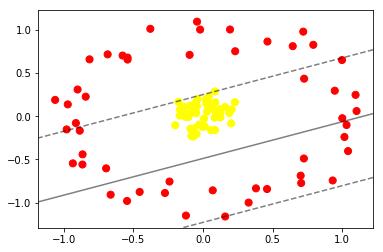

In [39]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')
plt_svc(SVC(kernel = 'linear').fit(X, Y), plot_support = False)

In [40]:
r = np.exp(- (X ** 2).sum(1))

In [41]:
r

array([ 0.98358871,  0.96712707,  0.22821878,  0.43163183,  0.37779823,
        0.3667347 ,  0.95712483,  0.28666235,  0.53371095,  0.30965745,
        0.98545771,  0.95359149,  0.34124781,  0.38139143,  0.97213744,
        0.37380802,  0.47754455,  0.9927337 ,  0.33138525,  0.40307867,
        0.96801901,  0.99273735,  0.98882034,  0.98747736,  0.59814805,
        0.48796009,  0.38923923,  0.30122185,  0.33458398,  0.98444335,
        0.94297634,  0.9763781 ,  0.34163126,  0.28268903,  0.34553424,
        0.97814537,  0.99492198,  0.43717671,  0.24157706,  0.97368462,
        0.99634546,  0.97078974,  0.96370217,  0.9494041 ,  0.96110746,
        0.28434998,  0.29454784,  0.42814271,  0.98455748,  0.31130453,
        0.98397644,  0.9899929 ,  0.95216274,  0.99098294,  0.98840466,
        0.42229251,  0.26929911,  0.96724849,  0.97878306,  0.94186124,
        0.9888958 ,  0.98574764,  0.96371556,  0.53840963,  0.97523704,
        0.98696111,  0.35170209,  0.26357129,  0.3357268 ,  0.91

In [42]:
from mpl_toolkits import mplot3d

In [43]:
def plot_3D(elev = 30, azim = 30, X = X, Y = Y, r = r):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c = Y, s = 50, cmap = "autumn")
    ax.view_init(elev = elev, azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [44]:
from ipywidgets import interact, fixed

In [45]:
interact(plot_3D, elev = [-90, -60, -30, 0, 30, 60, 90], azim = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], X = fixed(X), Y = fixed(Y), r = fixed(r))

/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30), Dropdown(description='azim', index=7, options=(-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180), value=30), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3D>

In [46]:
rbf = SVC(kernel = 'rbf', C = 1E6)
rbf.fit(X, Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

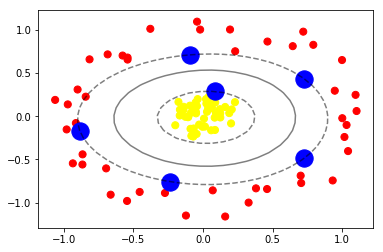

In [47]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')

# Ajustar los parametros del SVM

In [58]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)

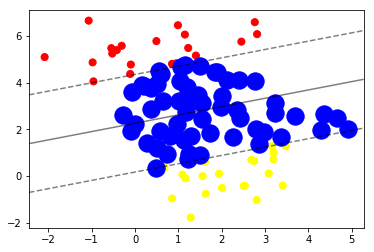

In [59]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')

model = SVC(kernel = 'linear', C = 0.01)
model.fit(X, Y)

plt_svc(model)

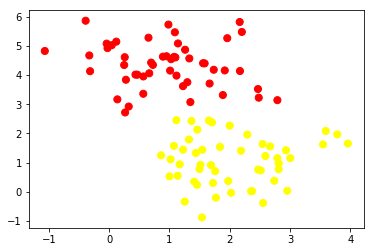

In [57]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')

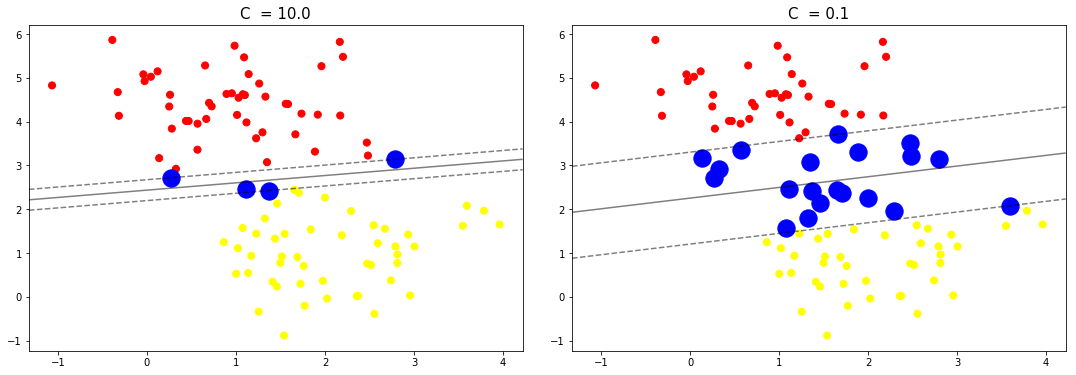

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'linear', C = C)
    model.fit(X, Y)
    ax_i.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')
    plt_svc(model, ax_i)
    ax_i.set_title("C  = {0:.1f}".format(C), size = 15)